In [31]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Read an image


In [2]:
img=cv2.imread("E:\\elephant.jpg",cv2.IMREAD_UNCHANGED)
# cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
# cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
# cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel
# Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.

# Display an image


In [3]:
cv2.imshow('image',img)
cv2.waitKey(0) # press any key to continue executing Its argument is the time in milliseconds
cv2.destroyAllWindows() #simply destroys all the windows we created

In [4]:
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img) #used to save an image.
    cv2.destroyAllWindows()

## Grayscaling

#### Grayscaling is process by which an image is converted from a full color to shades of grey (black & white)

In OpenCV, many functions grayscale images before processing. This is done because it simplifies the image, acting almost as a noise reduction and increasing processing time as there is less information in the image.

### Let convert our color image to greyscale

In [5]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('image',gray_img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',gray_img) #used to save an image.
    cv2.destroyAllWindows()

# color spaces
### HSV (Hue, Saturation, V/B Value/rightness)

In [33]:
#H: 0 - 180, S: 0 - 255, V: 0 - 255
# Hue : the color type (such as red, blue, or yellow).
# Saturation : the intensity of the color.
# Brightness (or Value) : the brightness of the color.

image= cv2.imread('E:\\elephant.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV image', hsv_image)
cv2.imshow('Hue channel', hsv_image[:, :, 0])
cv2.imshow('Saturation channel', hsv_image[:, :, 1])
cv2.imshow('Value channel', hsv_image[:, :, 2])
cv2.waitKey()
cv2.destroyAllWindows()

# lookng at individual channels in an RGB image

In [45]:
R,G,B=cv2.split(image)
cv2.imshow("Red chanel",R)
cv2.imshow("Green chanel",G)
cv2.imshow("Blue chanel",B)
cv2.waitKey()
cv2.destroyAllWindows()
# there is no big difference between the three images as they represented as grayscale image in 1D array

In [47]:
merged = cv2.merge([R, G, B]) 
cv2.imshow("Merged", merged) 
cv2.waitKey()
cv2.destroyAllWindows()

In [51]:
B, G, R = cv2.split(image)

# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")

cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Basic Operations on Images

In [120]:
im= cv2.imread('E:\\elephant.jpg')
for i in range(200):
    for j in range(400):
        im.itemset((i,j,1),45) # change value of specific color chanel
cv2.imshow("img", im) 
cv2.waitKey()
cv2.destroyAllWindows()

# Image ROI
ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

In [128]:
img= cv2.imread('E:\\elephant.jpg')
arr=img[100:340, 330:440] # getting sub-image
cv2.imshow("arr", arr) 
cv2.waitKey()
cv2.destroyAllWindows()

# Making Borders for Images (Padding)


src - input image

top, bottom, left, right - border width in number of pixels in corresponding directions

borderType - Flag defining what kind of border to be added. It can be following types:

cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.

cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb

cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba

cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh

cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg

value - Color of border if border type is cv2.BORDER_CONSTANT


In [213]:
img1= cv2.imread('E:\\elephant.jpg')
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT)
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,30,30,30,30,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,50,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,50,50,10,10,cv2.BORDER_WRAP)
idx=[img1,constant,replicate,reflect,reflect101,wrap]
title=['img1','constant','replicate','reflect','reflect101','wrap']
for i in range(len(idx)):
    cv2.imshow("tt", idx[i]) 
    cv2.waitKey()
cv2.destroyAllWindows()

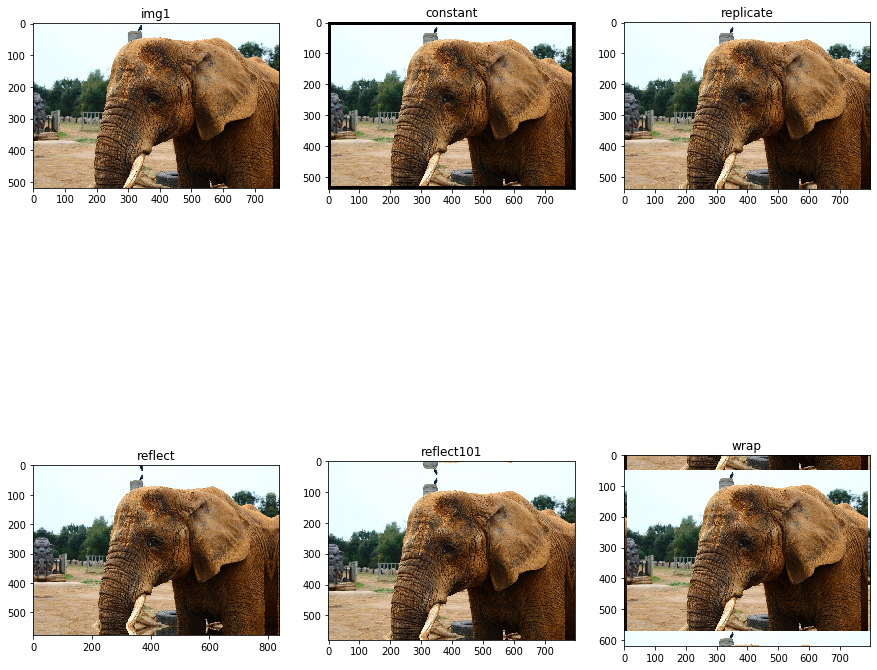

In [215]:
fig,ax=plt.subplots(2,3,figsize=(15,15))
for i ,j in enumerate(ax.flat):
    B,G,R=cv2.split(idx[i])
    j.imshow(cv2.merge([R,G,B]).reshape(idx[i].shape[0], idx[i].shape[1], 3))
    j.set_title(title[i])

# Histograms 

In [241]:
img1= cv2.imread('E:\\elephant.jpg')

So now we use cv2.calcHist() function to find the histogram. Let’s familiarize with the function and its parameters :

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
    
channels : it is also given in square brackets. It the index of channel for which we calculate histogram.
    
For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram

of blue,green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as “None”.But if you want to find histogram of particular
    
region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
    
histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

ranges : this is our RANGE. Normally, it is [0,256].

In [266]:
cv2.imshow('Hist',cv2.calcHist(img1,[0],None,[256],[0,256]))
cv2.waitKey()
cv2.destroyAllWindows()

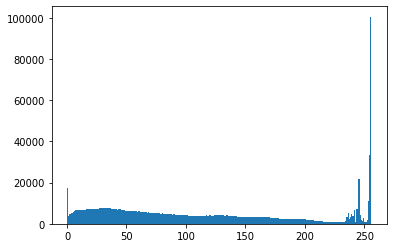

In [267]:
im=plt.hist(img1.ravel(),256,[0,256])
plt.show()

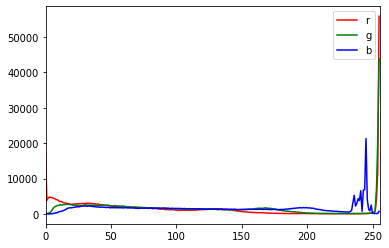

In [278]:
color=['r','g','b']
for i ,col in enumerate(color):
    hist=cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(hist,color=col,label=col)
    plt.xlim([0,256])
    plt.legend()